In [1]:
import praw
from psaw import PushshiftAPI
import pandas as pd
import datetime as dt
from dateutil import tz
from collections import Counter
from operator import itemgetter
import pprint
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
import re
import calmap

import networkx as nx
import community

from country_list import countries_for_language
import pycountry_convert as pc
import plotly.express as px
import json

from prawcore.exceptions import Forbidden, NotFound

In [2]:
with open("Credentials/redditCredentials.json", "r") as file:
    credentials = json.load(file)

In [3]:
reddit = praw.Reddit(client_id='jVOwZEXa-pRhqA', \
                     client_secret='freZdz3v02WKwQYkN84N8Aq_Ug4', \
                     user_agent='test', \
                     username=credentials['username'], \
                     password=credentials['password'])
psawAPI = PushshiftAPI(reddit)

In [4]:
subreddit = reddit.subreddit('conspiracy')

In [5]:
top_subreddit = subreddit.top()
to_zone = tz.tzlocal()

#### Corona Virus Analysis

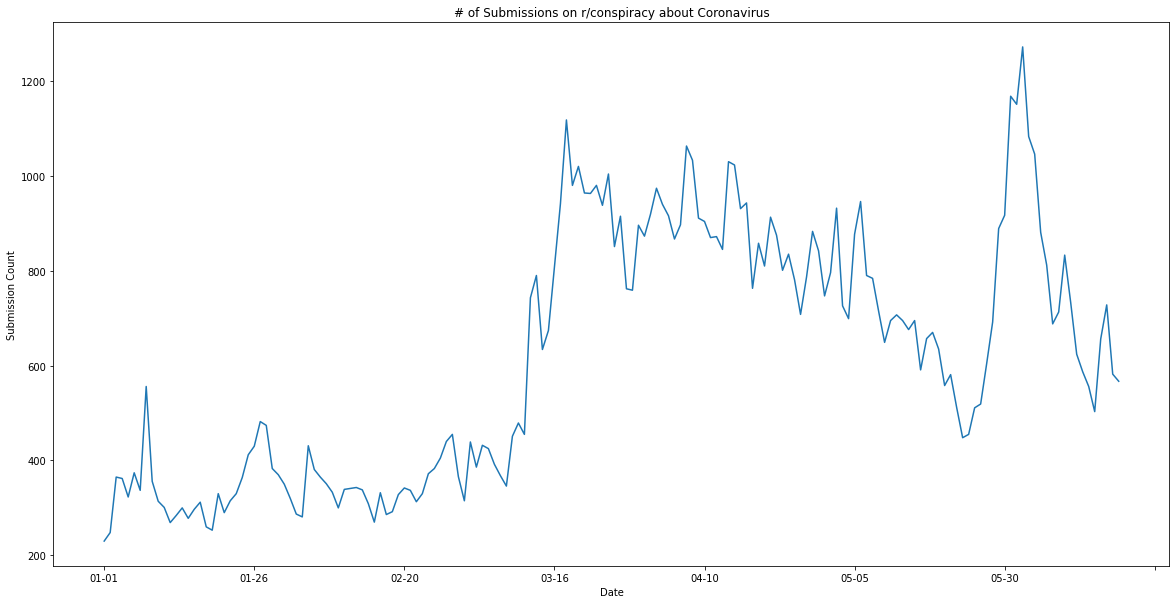

In [30]:
dateList = []
dates, values = [], []
startEpoch = int(dt.datetime(2020, 1, 1).timestamp())
endEpoch = int(dt.datetime(2020, 6, 19).timestamp())

coronaSubs = list(psawAPI.search_submissions(before=endEpoch,
                                             after=startEpoch,
                                             subreddit='conspiracy',
                                            filter=['title', 'created_utc']))

coronaCount = Counter([dt.datetime.fromtimestamp(submission.created_utc).date().strftime('%m-%d') for submission in coronaSubs])
datesDict = [{'Date': date, '# Submissions': coronaCount[date]} for date in coronaCount.keys()] 
datesDF = pd.DataFrame(datesDict).sort_values(by='Date').set_index('Date')

ax = datesDF.plot.line(figsize=(20, 10))
ax.get_legend().remove()
ax.title.set_text('# of Submissions on r/conspiracy about Coronavirus')
ax.set_xlabel('Date')
ax.set_ylabel('Submission Count')

fig = ax.get_figure()
fig.savefig('Conspiracy Time Graphs/covid.png')

#### China Analysis

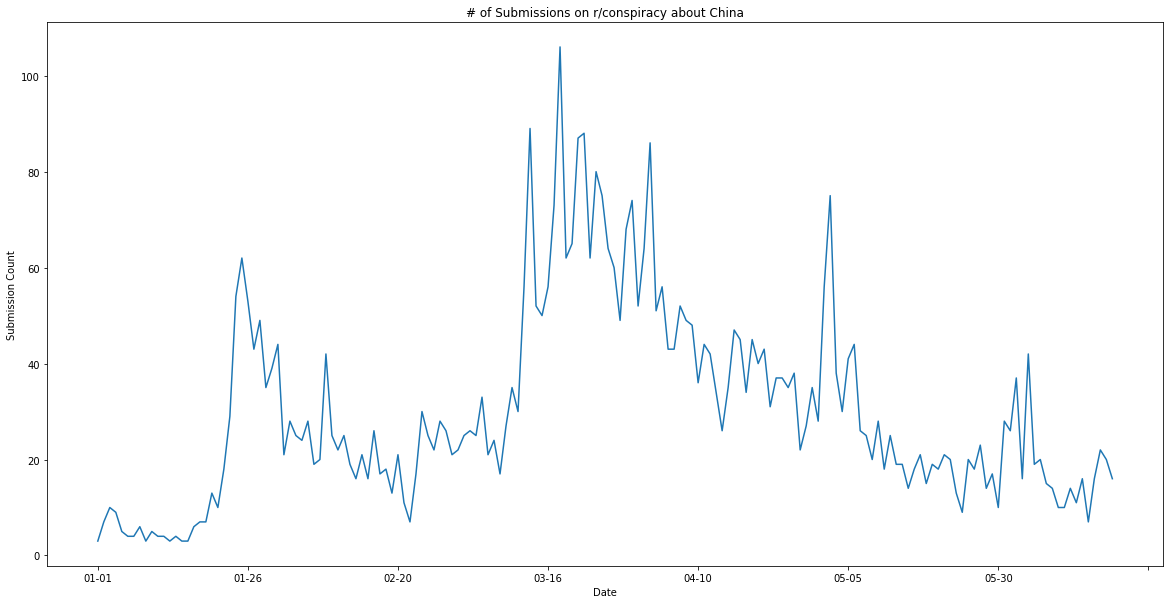

In [31]:
dateList = []
dates, values = [], []

chinaSubs = list(psawAPI.search_submissions(before=endEpoch,
                                        after=startEpoch,
                                        subreddit='conspiracy',
                                        q=['china'],
                                        filter=['created_utc', 'title']))

chinaCount = Counter([dt.datetime.fromtimestamp(submission.created_utc).date().strftime('%m-%d') for submission in chinaSubs])
datesDict = [{'Date': date, '# Submissions': chinaCount[date]} for date in chinaCount.keys()] 
datesDF = pd.DataFrame(datesDict).sort_values(by='Date').set_index('Date')

ax = datesDF.plot.line(figsize=(20, 10))
ax.get_legend().remove()
ax.title.set_text('# of Submissions on r/conspiracy about China')
ax.set_xlabel('Date')
ax.set_ylabel('Submission Count')

fig = ax.get_figure()
fig.savefig('Conspiracy Time Graphs/china.png')

#### 5G Analysis

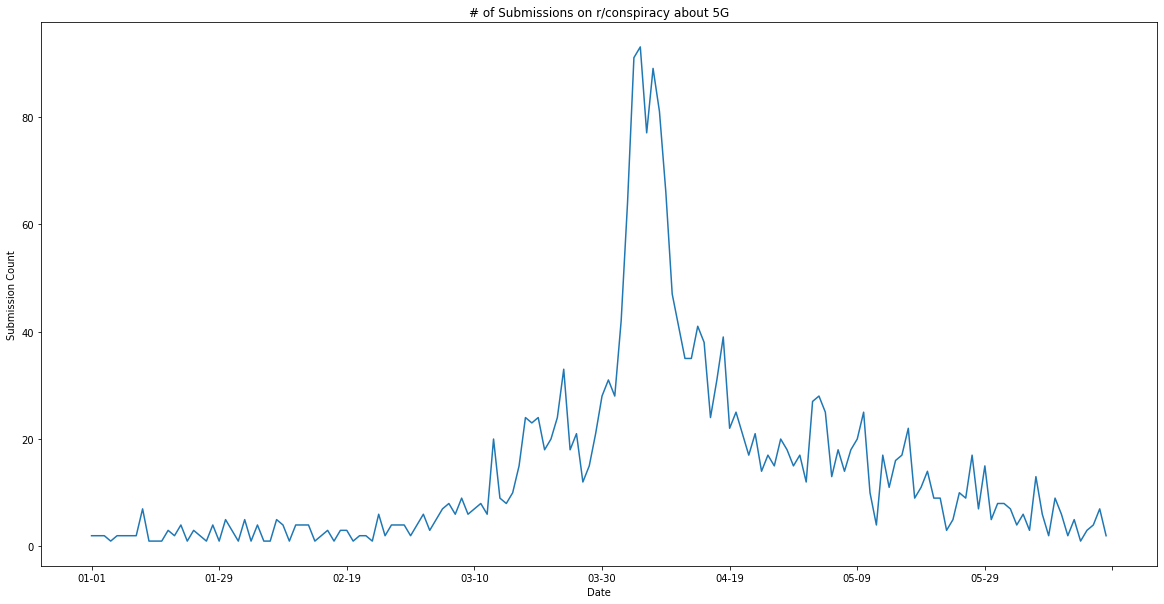

In [32]:
dateList = []
dates, values = [], []

fiveGSubs = list(psawAPI.search_submissions(before=endEpoch,
                                        after=startEpoch,
                                        subreddit='conspiracy',
                                        q=['5g'],
                                        filter=['created_utc', 'title']))
fiveGCount = Counter([dt.datetime.fromtimestamp(submission.created_utc).date().strftime('%m-%d') for submission in fiveGSubs])
datesDict = [{'Date': date, '# Submissions': fiveGCount[date]} for date in fiveGCount.keys()] 
datesDF = pd.DataFrame(datesDict).sort_values(by='Date').set_index('Date')

ax = datesDF.plot.line(figsize=(20, 10))
ax.get_legend().remove()
ax.title.set_text('# of Submissions on r/conspiracy about 5G')
ax.set_xlabel('Date')
ax.set_ylabel('Submission Count')

fig = ax.get_figure()
fig.savefig('Conspiracy Time Graphs/5g.png')

#### Adrenochrome Analysis

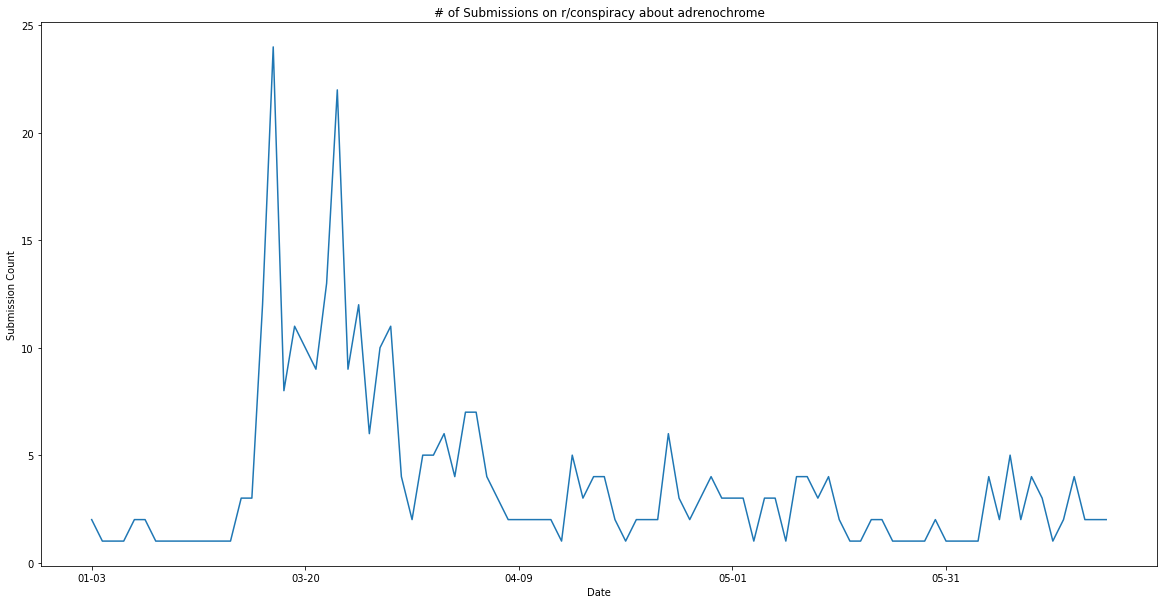

In [33]:
dateList = []
dates, values = [], []

adrenochromeSubs = list(psawAPI.search_submissions(before=endEpoch,
                                        after=startEpoch,
                                        subreddit='conspiracy',
                                        q=['adrenochrome'],
                                        filter=['created_utc', 'title']))
adrenochromeCount = Counter([dt.datetime.fromtimestamp(submission.created_utc).date().strftime('%m-%d') for submission in adrenochromeSubs])
datesDict = [{'Date': date, '# Submissions': adrenochromeCount[date]} for date in adrenochromeCount.keys()] 
datesDF = pd.DataFrame(datesDict).sort_values(by='Date').set_index('Date')

ax = datesDF.plot.line(figsize=(20, 10))
ax.get_legend().remove()
ax.title.set_text('# of Submissions on r/conspiracy about adrenochrome')
ax.set_xlabel('Date')
ax.set_ylabel('Submission Count')

fig = ax.get_figure()
fig.savefig('Conspiracy Time Graphs/adrenochrome.png')

#### Epstein scandal analysis

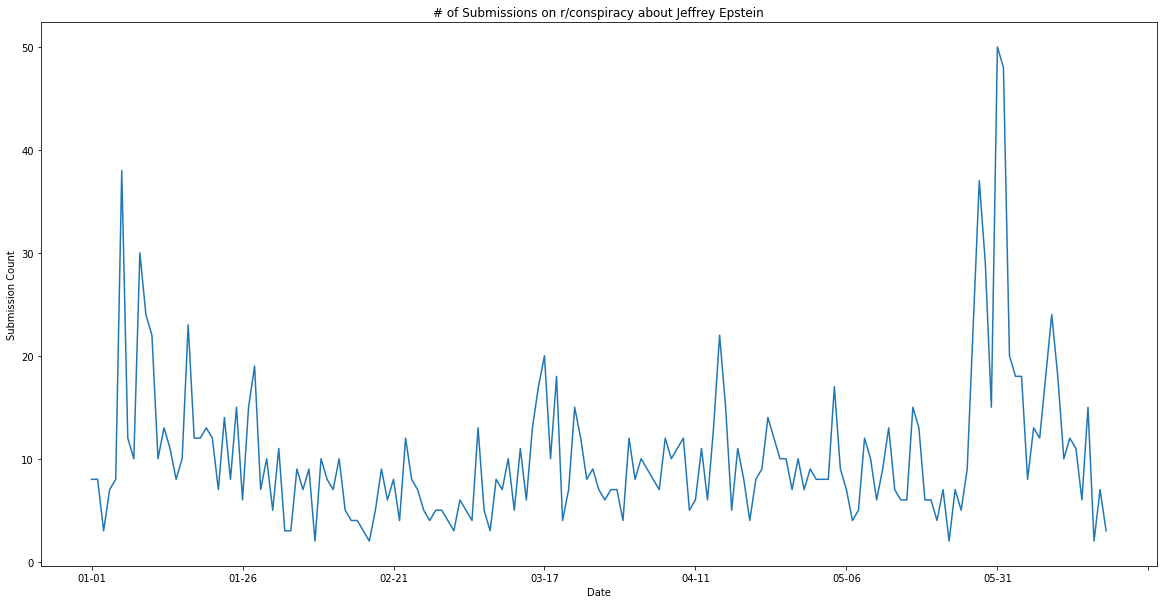

In [34]:
dateList = []

epsteinSubs = list(psawAPI.search_submissions(before=endEpoch,
                                        after=startEpoch,
                                        subreddit='conspiracy',
                                        q=['epstein'],
                                        filter=['created_utc', 'title']))
epsteinCount = Counter([dt.datetime.fromtimestamp(submission.created_utc).date().strftime('%m-%d') for submission in epsteinSubs])
datesDict = [{'Date': date, '# Submissions': epsteinCount[date]} for date in epsteinCount.keys()] 
datesDF = pd.DataFrame(datesDict).sort_values(by='Date').set_index('Date')

ax = datesDF.plot.line(figsize=(20, 10))
ax.get_legend().remove()
ax.title.set_text('# of Submissions on r/conspiracy about Jeffrey Epstein')
ax.set_xlabel('Date')
ax.set_ylabel('Submission Count')

fig = ax.get_figure()
fig.savefig('Conspiracy Time Graphs/epstein.png')

#### Climate Debate Analysis

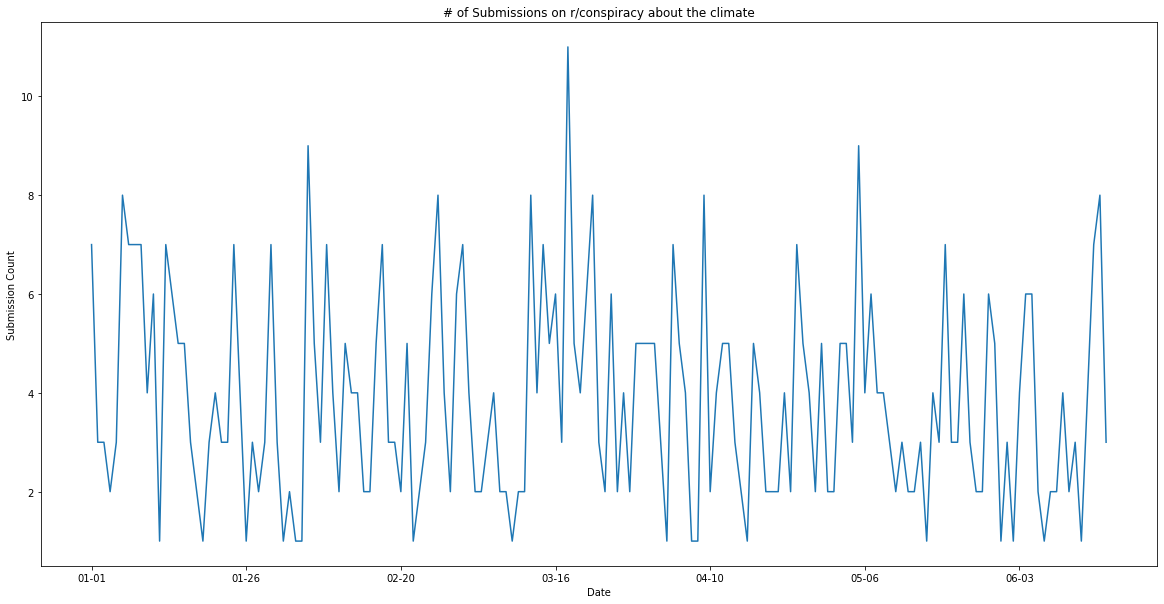

In [35]:
dateList = []

climateSubs = list(psawAPI.search_submissions(before=endEpoch,
                                        after=startEpoch,
                                        subreddit='conspiracy',
                                        q=['climate'],
                                        filter=['created_utc', 'title']))
climateCount = Counter([dt.datetime.fromtimestamp(submission.created_utc).date().strftime('%m-%d') for submission in climateSubs])
datesDict = [{'Date': date, '# Submissions': climateCount[date]} for date in climateCount.keys()] 
datesDF = pd.DataFrame(datesDict).sort_values(by='Date').set_index('Date')

ax = datesDF.plot.line(figsize=(20, 10))
ax.get_legend().remove()
ax.title.set_text('# of Submissions on r/conspiracy about the climate')
ax.set_xlabel('Date')
ax.set_ylabel('Submission Count')

fig = ax.get_figure()
fig.savefig('Conspiracy Time Graphs/climate.png')

In [18]:
gildedConspiracyList = []
for item in reddit.subreddit('conspiracy').gilded():
    if type(item.author) is praw.models.reddit.redditor.Redditor:
        gildedConspiracyList.append({'author': item.author.name, 'score': item.score, 
                                     'created': item.created_utc})

In [19]:
gildedConspiracyListSorted = sorted(gildedConspiracyList, key=itemgetter('score'))
popularConspiracyUsers = list(set([user['author'] for user in gildedConspiracyListSorted[-500:]]))

### Analysis of the most popular users for the Coronavirus thread

#### 1. Analysis of the content of their most controversial comments on Reddit

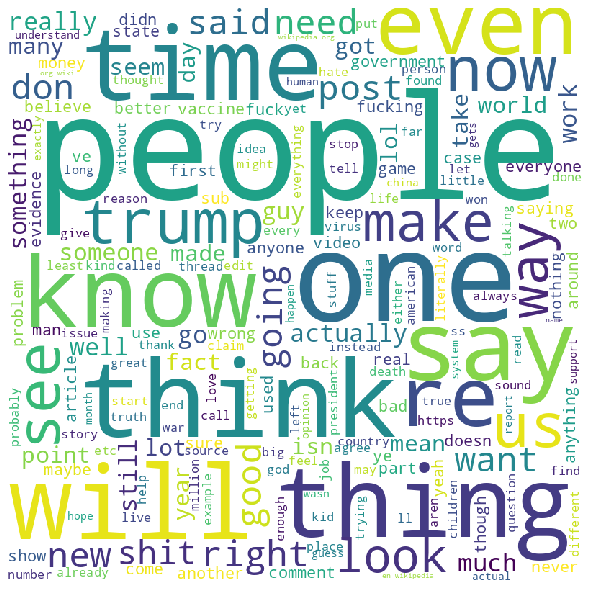

In [20]:
stopwords = set(STOPWORDS)
comments = ""

for user in popularConspiracyUsers:
    userComments = reddit.redditor(user).comments.controversial(limit=300)
    try:
        for comment in userComments:
            commentFiltered = comment.body
            tokens = [token.lower() for token in commentFiltered.split()]
            for token in tokens:
                comments = comments + token + " "

        comments = re.sub('[^a-zA-Z0-9 \n]', ' ', comments)
    except Forbidden:
        print("Forbidden comment")
        
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comments) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('Reddit Conspiracy Overall/conspiracy_wc.png')

### Study of the comments of the most gilded r/conspiracy users

In [21]:
conspiracyCommentCount = {}
for conspiracyUser in popularConspiracyUsers:
    try:
        for comment in reddit.redditor(conspiracyUser).new(limit=300):
            if comment.subreddit.display_name not in conspiracyCommentCount.keys():
                conspiracyCommentCount[comment.subreddit.display_name] = 1
            else:
                conspiracyCommentCount[comment.subreddit.display_name] += 1
    except Forbidden:
        print("Forbidden comment")

In [22]:
conspiracyGraph = nx.Graph()
conspiracyGraph.add_node('conspiracy', commentCount=conspiracyCommentCount['conspiracy'])

for subreddit, count in conspiracyCommentCount.items():
    if subreddit != 'conspiracy':
        conspiracyGraph.add_node(subreddit, commentCount = count)
        conspiracyGraph.add_edge(subreddit, 'conspiracy', weight=count)
        
conspiracyPartition = community.best_partition(conspiracyGraph)
nx.set_node_attributes(conspiracyGraph, name='community', values=conspiracyPartition)

countDict = nx.get_node_attributes(conspiracyGraph, 'commentCount')
countDictSorted = sorted(countDict, key=countDict.get, reverse=True)

conspiracyGraph.remove_nodes_from(countDictSorted[100:])
#for subreddit in countDictSorted[:100]:
#    conspiracyGraph.nodes[subreddit]['popularity'] = 1
    
nx.write_gexf(conspiracyGraph, 'Reddit Conspiracy Overall/conspiracyMovement.gexf')

#### 2. Study of the other Subreddits where these users created posts

In [37]:
conspiracyScore, conspiracyCount, conspiracyUser = {}, {}, {} # dictionaries used to keep track of all user's scores and submissions

for user in popularConspiracyUsers:
    userScore, userCount = {}, {} # dictionaries used to store the user score and number of submission in each subreddit
    userVisitedSubreddit = []
    try:
        for submission in reddit.redditor(user).submissions.top('all'):
            if submission.subreddit.display_name not in userScore.keys():
                userScore[submission.subreddit.display_name] = submission.score
                userCount[submission.subreddit.display_name] = 1
            else:
                userScore[submission.subreddit.display_name] += submission.score
                userCount[submission.subreddit.display_name] += 1

            if submission.subreddit.display_name not in conspiracyScore.keys():
                conspiracyScore[submission.subreddit.display_name] = submission.score
                conspiracyCount[submission.subreddit.display_name] = 1

            else:
                conspiracyScore[submission.subreddit.display_name] += submission.score
                conspiracyCount[submission.subreddit.display_name] += 1

            if submission.subreddit.display_name not in userVisitedSubreddit:
                userVisitedSubreddit.append(submission.subreddit.display_name)
                if submission.subreddit.display_name not in conspiracyUser:
                    conspiracyUser[submission.subreddit.display_name] = 1
                else:
                    conspiracyUser[submission.subreddit.display_name] += 1
    except Forbidden:
        print("Forbidden")    
            
    # We compute the user's average score for each subreddit 
    for subreddit in userScore.keys():
        userScore[subreddit] = userScore[subreddit] / userCount[subreddit]

subredditFiltered = []
for subreddit in conspiracyScore.keys():
    if conspiracyUser[subreddit] < 4 or str(subreddit) == 'conspiracy':
        # Remove subreddits with only one user
        subredditFiltered.append(subreddit)
    else:
        conspiracyScore[subreddit] = conspiracyScore[subreddit] / conspiracyCount[subreddit]

for subreddit in subredditFiltered:
    conspiracyScore.pop(subreddit, None)
    conspiracyCount.pop(subreddit, None)
    conspiracyUser.pop(subreddit, None)

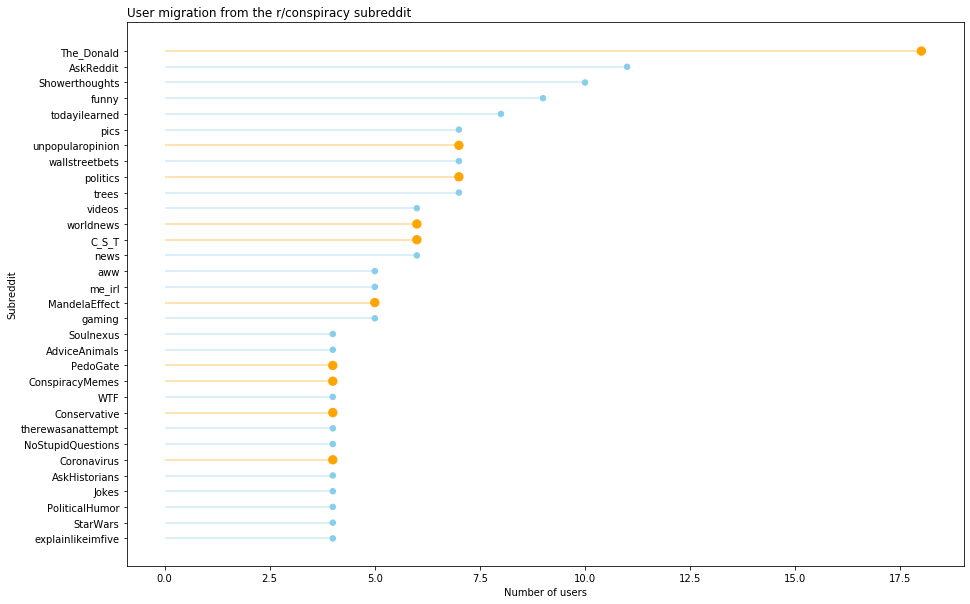

In [38]:
conspiracySubredditDF = pd.DataFrame(conspiracyUser.items(), columns=['Subreddit', 'UserCount']).sort_values(by='UserCount')
conspiracySubs = ['conspiracy', 'UFOs', 'CoronavirusConspiracy', 'WayOfTheBern', 'politics', 
                  'Conservative', 'LateStageCapitalism', 'iamatotalpieceofshit', 'WatchRedditDie',
                  'dankmemes', 'Coronavirus', 'SandersForPresident', 'ConspiracyMemes', 'PedoGate', 'worldnews',
                  'The_Donald', 'unpopularopinion', 'C_S_T', 'MandelaEffect']
conspiracyRange = range(1, len(conspiracySubredditDF.index) + 1)
conspiracyColor= np.where(conspiracySubredditDF['Subreddit'].isin(conspiracySubs), 'orange', 'skyblue')
conspiracySize = np.where(conspiracySubredditDF['Subreddit'].isin(conspiracySubs), 70, 30)

plt.figure(figsize=(15,10))
plt.hlines(y=conspiracyRange, xmin=0, xmax=conspiracySubredditDF['UserCount'], color=conspiracyColor, alpha=0.4)
plt.scatter(conspiracySubredditDF['UserCount'], conspiracyRange, color=conspiracyColor, s=conspiracySize, alpha=1)

plt.yticks(conspiracyRange, conspiracySubredditDF['Subreddit'])
plt.title("User migration from the r/conspiracy subreddit", loc='left')
plt.xlabel('Number of users')
plt.ylabel('Subreddit')
plt.savefig('Reddit Conspiracy Overall/conspiracyMigration.png')

### CONTROL GROUP: Same analysis with r/science users

In [25]:
gildedScienceList = []
for item in reddit.subreddit('science').gilded():
    if type(item.author) is praw.models.reddit.redditor.Redditor:
        gildedScienceList.append({'author': item.author.name, 'score': item.score})

In [26]:
gildedScienceListSorted = sorted(gildedScienceList, key=itemgetter('score'))
popularScienceUsers = list(set([user['author'] for user in gildedScienceListSorted[-500:]]))

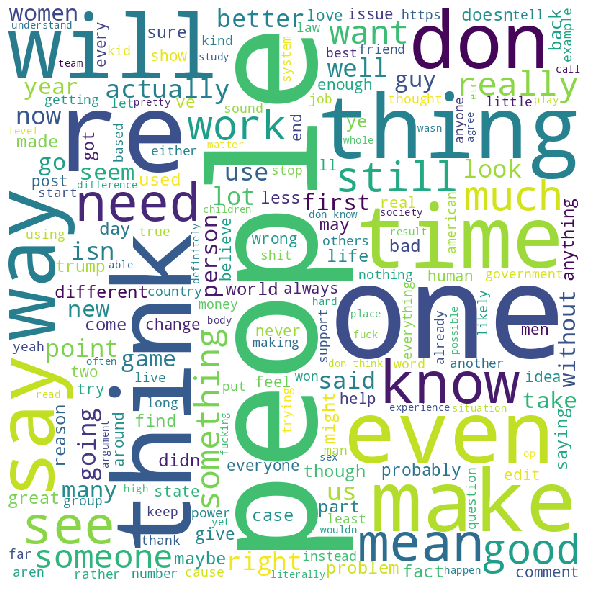

In [27]:
stopwords = set(STOPWORDS)
comments = ""

for user in popularScienceUsers:
    userComments = reddit.redditor(user).comments.controversial(limit=300)
    try:
        for comment in userComments:
            commentFiltered = comment.body
            tokens = [token.lower() for token in commentFiltered.split()]
            for token in tokens:
                comments = comments + token + " "

        comments = re.sub('[^a-zA-Z0-9 \n]', ' ', comments)
    except Forbidden:
        print("Forbidden comment")
        
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comments) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('Reddit Conspiracy Overall/science_wc.png')

### Study of the comments of the most gilded r/science users

In [28]:
scienceCommentCount = {}
for scienceUser in popularScienceUsers:
    try:
        for comment in reddit.redditor(scienceUser).new(limit=300):
            if comment.subreddit.display_name not in scienceCommentCount.keys():
                scienceCommentCount[comment.subreddit.display_name] = 1
            else:
                scienceCommentCount[comment.subreddit.display_name] += 1
    except Forbidden:
        print("Forbidden comment")

In [29]:
scienceGraph = nx.Graph()
scienceGraph.add_node('science', commentCount=scienceCommentCount['science'])

for subreddit, count in scienceCommentCount.items():
    if subreddit != 'science':
        scienceGraph.add_node(subreddit, commentCount = count)
        scienceGraph.add_edge(subreddit, 'science', weight=count)

countDict = nx.get_node_attributes(scienceGraph, 'commentCount')
countDictSorted = sorted(countDict, key=countDict.get, reverse=True)

scienceGraph.remove_nodes_from(countDictSorted[100:])
    
nx.write_gexf(scienceGraph, 'Reddit Conspiracy Overall/scienceMovement.gexf')

#### 2. Study of the other Subreddits where these users created posts

In [40]:
scienceScore, scienceCount, scienceUser = {}, {}, {} # dictionaries used to keep track of all user's scores and submissions

for user in popularScienceUsers:
    userScore, userCount = {}, {} # dictionaries used to store the user score and number of submission in each subreddit
    userVisitedSubreddit = []
    try:
        for submission in reddit.redditor(user).submissions.top('all'):
            if submission.subreddit.display_name not in userScore.keys():
                userScore[submission.subreddit.display_name] = submission.score
                userCount[submission.subreddit.display_name] = 1
            else:
                userScore[submission.subreddit.display_name] += submission.score
                userCount[submission.subreddit.display_name] += 1

            if submission.subreddit.display_name not in scienceScore.keys():
                scienceScore[submission.subreddit.display_name] = submission.score
                scienceCount[submission.subreddit.display_name] = 1

            else:
                scienceScore[submission.subreddit.display_name] += submission.score
                scienceCount[submission.subreddit.display_name] += 1

            if submission.subreddit.display_name not in userVisitedSubreddit:
                userVisitedSubreddit.append(submission.subreddit.display_name)
                if submission.subreddit.display_name not in scienceUser:
                    scienceUser[submission.subreddit.display_name] = 1
                else:
                    scienceUser[submission.subreddit.display_name] += 1
    except Forbidden:
        print("Forbidden")    
            
    # We compute the user's average score for each subreddit 
    for subreddit in userScore.keys():
        userScore[subreddit] = userScore[subreddit] / userCount[subreddit]

subredditFiltered = []
for subreddit in scienceScore.keys():
    if scienceUser[subreddit] < 4 or str(subreddit) == 'science':
        # Remove subreddits with less than four users
        subredditFiltered.append(subreddit)
    else:
        scienceScore[subreddit] = scienceScore[subreddit] / scienceCount[subreddit]

for subreddit in subredditFiltered:
    scienceScore.pop(subreddit, None)
    scienceCount.pop(subreddit, None)
    scienceUser.pop(subreddit, None)

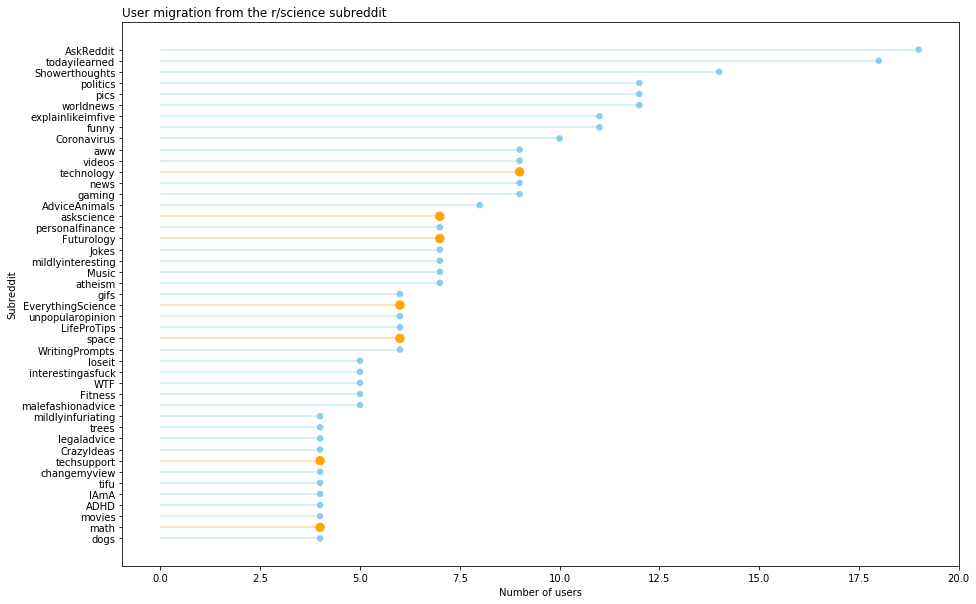

In [41]:
scienceSubredditDF = pd.DataFrame(scienceUser.items(), columns=['Subreddit', 'UserCount']).sort_values(by='UserCount')
scienceSubs = ['technology', 'EverythingScience', 'NoStupidQuestions', 'Futurology', 'DotA2', 'space', 'askscience', 'techsupport', 'math']
scienceRange = range(1, len(scienceSubredditDF.index) + 1)
scienceColor= np.where(scienceSubredditDF['Subreddit'].isin(scienceSubs), 'orange', 'skyblue')
scienceSize = np.where(scienceSubredditDF['Subreddit'].isin(scienceSubs), 70, 30)

plt.figure(figsize=(15,10))
plt.hlines(y=scienceRange, xmin=0, xmax=scienceSubredditDF['UserCount'], color=scienceColor, alpha=0.4)
plt.scatter(scienceSubredditDF['UserCount'], scienceRange, color=scienceColor, s=scienceSize, alpha=1)

plt.yticks(scienceRange, scienceSubredditDF['Subreddit'])
plt.title("User migration from the r/science subreddit", loc='left')
plt.xlabel('Number of users')
plt.ylabel('Subreddit')
plt.savefig('Reddit Conspiracy Overall/scienceMigration.png')

### Comparison of the score of r/conspiracy and r/science users on similar subreddits

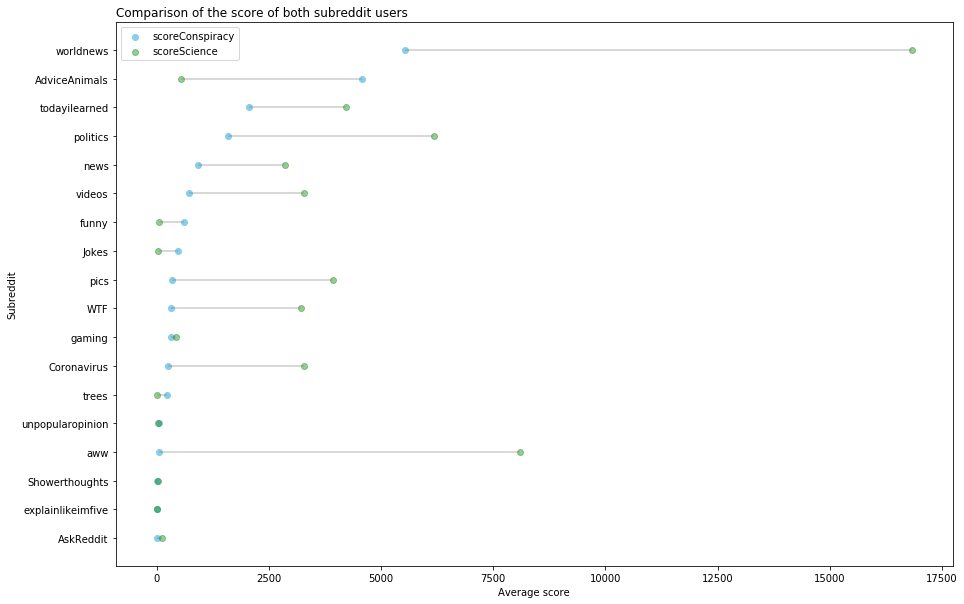

In [32]:
commonDF = pd.DataFrame(columns=['subreddit', 'scoreConspiracy', 'scoreScience'])
for commonSub in list(set(list(scienceScore.keys())).intersection(set(list(conspiracyScore.keys())))):
    subSeries = pd.Series({'subreddit': commonSub, 'scoreConspiracy': conspiracyScore[commonSub],
                           'scoreScience': scienceScore[commonSub]})
    commonDF = commonDF.append(subSeries, ignore_index=True)
    
commonDF = commonDF.sort_values(by='scoreConspiracy')
dfRange = range(1, len(commonDF.index) + 1)

# Lollipop plot

plt.figure(figsize=(15,10))
plt.hlines(y=dfRange, xmin=commonDF['scoreConspiracy'], xmax=commonDF['scoreScience'], color='grey', alpha=0.4)
plt.scatter(commonDF['scoreConspiracy'], dfRange, color='skyblue', alpha=1, label='scoreConspiracy')
plt.scatter(commonDF['scoreScience'], dfRange, color='green', alpha=0.4 , label='scoreScience')
plt.legend()

plt.yticks(dfRange, commonDF['subreddit'])
plt.title("Comparison of the score of both subreddit users", loc='left')
plt.xlabel('Average score')
plt.ylabel('Subreddit')
plt.savefig('Reddit Conspiracy Overall/conspiScienceComp.png')

### Creation of a graph with each user from the two subreddits connected to the other subreddits

In [33]:
positiveGraph, negativeGraph = nx.Graph(), nx.Graph()

for scienceUser in popularScienceUsers:
    positiveGraph.add_node(scienceUser, nodeType='scienceUser', userScore=0)
    negativeGraph.add_node(scienceUser, nodeType='scienceUser', userScore=0)
    userComments = reddit.redditor(scienceUser).comments.controversial(limit=100)
    try:
        for comment in userComments:
            if comment.score > 0:
                positiveGraph.nodes[scienceUser]['userScore'] += comment.score
                if comment.subreddit not in positiveGraph.nodes():
                    positiveGraph.add_node(comment.subreddit, nodeType='subreddit')
                    
                positiveGraph.add_edge(scienceUser, comment.subreddit, weight=comment.score)
                
            elif comment.score < 0:
                negativeGraph.nodes[scienceUser]['userScore'] -= comment.score
                if comment.subreddit not in negativeGraph.nodes():
                    negativeGraph.add_node(comment.subreddit, nodeType='subreddit')
                    
                negativeGraph.add_edge(scienceUser, comment.subreddit, weight=-comment.score)
                
    except Forbidden:
        print("Forbidden")

print('-- STARTING CONSPIRACY USERS --')

for conspiracyUser in popularConspiracyUsers:
    positiveGraph.add_node(conspiracyUser, nodeType='conspiracyUser', userScore=0)
    negativeGraph.add_node(conspiracyUser, nodeType='conspiracyUser', userScore=0)
    userComments = reddit.redditor(scienceUser).comments.controversial(limit=100)
    try:
        for comment in userComments:
            if comment.score > 0:
                positiveGraph.nodes[conspiracyUser]['userScore'] += comment.score
                if comment.subreddit not in positiveGraph.nodes():
                    positiveGraph.add_node(comment.subreddit, nodeType='subreddit')
                    
                positiveGraph.add_edge(conspiracyUser, comment.subreddit, weight=comment.score)
                
            elif comment.score < 0:
                negativeGraph.nodes[conspiracyUser]['userScore'] -= comment.score
                if comment.subreddit not in negativeGraph.nodes():
                    negativeGraph.add_node(comment.subreddit, nodeType='subreddit')
                    
                negativeGraph.add_edge(conspiracyUser, comment.subreddit, weight=-comment.score)
                
    except Forbidden:
        print("Forbidden")

-- STARTING CONSPIRACY USERS --


In [34]:
nx.write_gexf(positiveGraph, 'positive.gexf')
nx.write_gexf(negativeGraph, 'negative.gexf')

### Study of the involvement of r/conspiracy and r/science users in countries subreddit

In [42]:
subredditList = pd.read_csv('subreddits.csv').dropna()
conspiracyDF = pd.DataFrame()
countryDF = pd.DataFrame()

In [43]:
for index, row in subredditList.iterrows():
    if 'conspiracy' in row.desc:
        conspiracyDF = conspiracyDF.append(row)

In [44]:
countries = dict(countries_for_language('en'))
countryList = [country.lower() for country in list(countries.values())]
for index, row in subredditList.iterrows():
    if row.real_name.lower() in countryList:
        countryDF = countryDF.append(row)

In [45]:
countryConspiracy = {}

for submission in reddit.subreddit('conspiracy').top(limit=200):
    try:
        if str(submission.author) != 'None':
            for comment in reddit.redditor(submission.author.name).new(limit=1000):
                if comment.subreddit.display_name.lower() in countryList:
                    if comment.subreddit.display_name.lower() not in countryConspiracy.keys():
                        countryConspiracy[comment.subreddit.display_name.lower()] = 1
                    else:
                        countryConspiracy[comment.subreddit.display_name.lower()] += 1
    except Exception:
        print('Forbidden')

Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden
Forbidden


In [46]:
countryScience = {}

for submission in reddit.subreddit('science').top(limit=200):
    try:
        if str(submission.author) != 'None':
            for comment in reddit.redditor(submission.author.name).new(limit=1000):
                if comment.subreddit.display_name.lower() in countryList:
                    if comment.subreddit.display_name.lower() not in countryScience.keys():
                        countryScience[comment.subreddit.display_name.lower()] = 1
                    else:
                        countryScience[comment.subreddit.display_name.lower()] += 1
    except Exception:
        print('Forbidden')

Forbidden
Forbidden
Forbidden


#### Comparison of the results for the r/conspiracy and r/science users

In [47]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

scienceContinentList = [continents[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country.title()))]
                        for country in countryScience]
conspiracyContinentList = [continents[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country.title()))]
                        for country in countryConspiracy]

In [48]:
scienceMapDF = pd.DataFrame({'country': [country.title() for country in list(countryScience.keys())],
                             'country_iso': [pc.country_name_to_country_alpha3(country.title()) for country in countryScience],
                             'continent': scienceContinentList,
                             'numberUsers': list(countryScience.values())})
conspiracyMapDF = pd.DataFrame({'country': [country.title() for country in list(countryConspiracy.keys())],
                                'country_iso': [pc.country_name_to_country_alpha3(country.title()) for country in countryConspiracy],
                                'continent': conspiracyContinentList,
                                'numberUsers': list(countryConspiracy.values())})

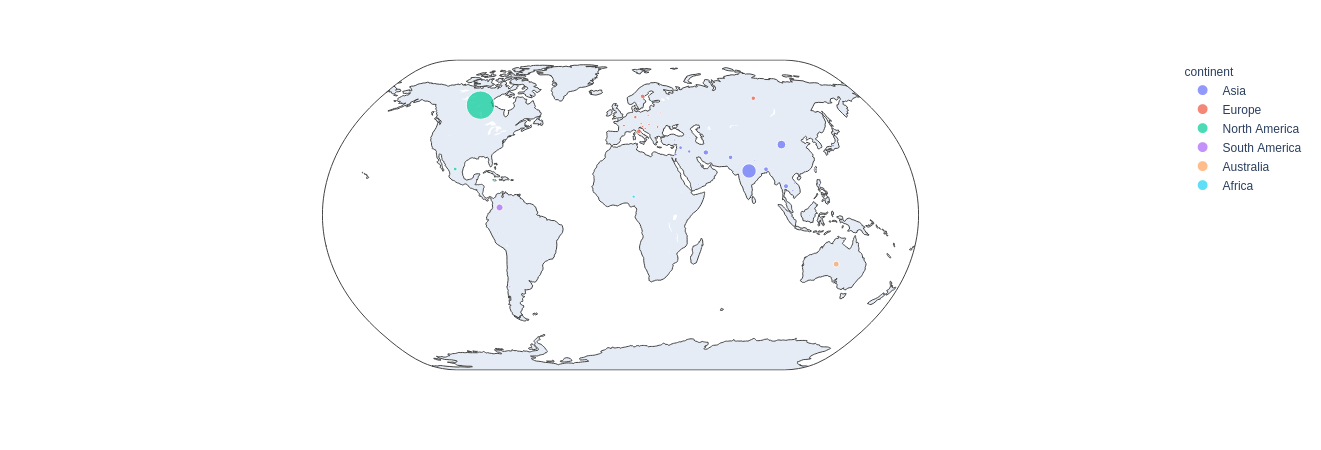

In [51]:
figScience = px.scatter_geo(scienceMapDF, locations="country_iso", color="continent",
                     hover_name="country", size="numberUsers",
                     projection="natural earth")
figScience.show()

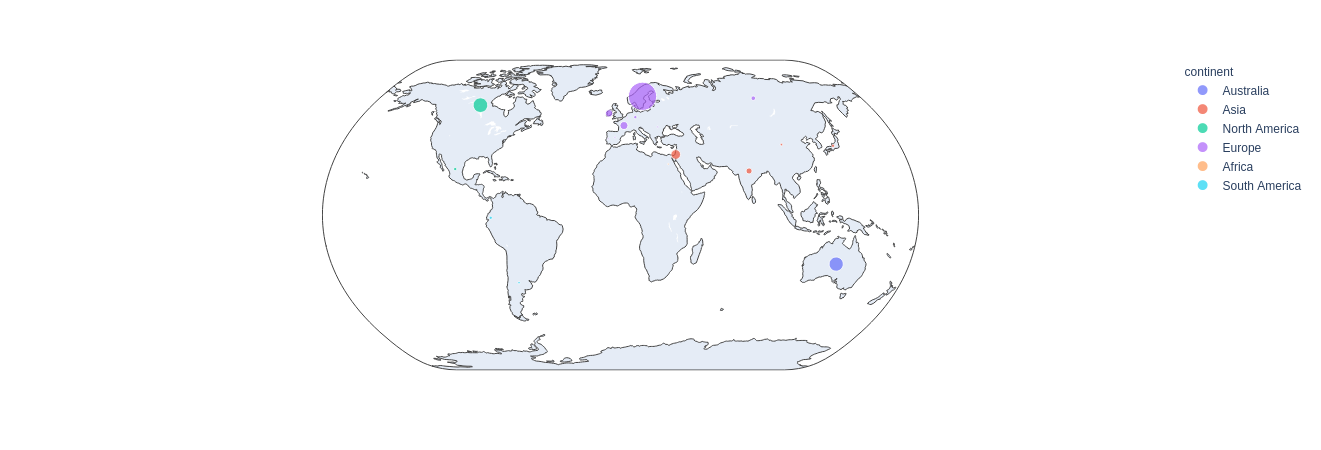

ValueError: Image generation requires the psutil package.

Install using pip:
    $ pip install psutil

Install using conda:
    $ conda install psutil


In [54]:
fig = px.scatter_geo(conspiracyMapDF, locations="country_iso", color="continent",
                     hover_name="country", size="numberUsers",
                     projection="natural earth")
fig.show()